In [1]:
from Hamiltonian_definition import build_HN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

In [52]:
# data_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"
data_path = r"C:/Users/Costa/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"


all_theta = [i*np.pi/16 for i in range(9)]
F=3 # to choose a folder == to chose a pair J1,J2
J1 = np.sin(all_theta[F])
J2 = np.cos(all_theta[F])
folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
print(folder_name)

Lanczos_path = data_path + "Lanczos/" + folder_name
exact_path = data_path + folder_name

J1=0.56_J2=0.83/


### lattice

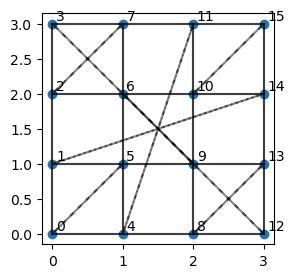

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [53]:
Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)

coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

### Eigvals comparison

I want to compare diagonalization results using la.eigh and eigsh

### 50 eigvals

In [54]:
# exact diag data 
all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(exact_path+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

# Lanczos data (first 50 eigvals)
lanczos_eigvals = np.load(Lanczos_path + "50eigvals.npy")


C:\Users\Costa\AppData\Local\Temp\ipykernel_3980\810106399.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


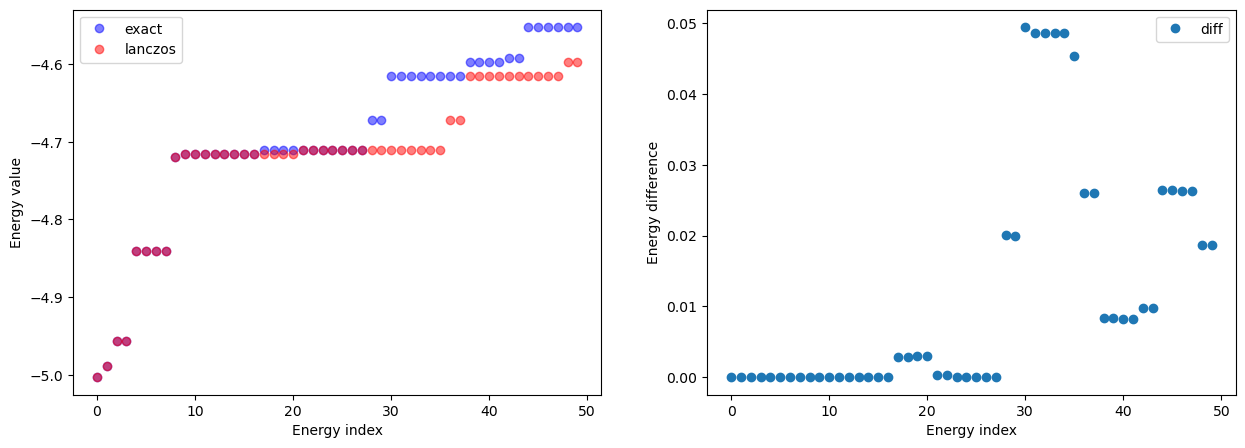

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))


ax1.plot(all_eigvals_sorted[0:50], 'o', color='blue', alpha=0.5, label="exact" )
ax1.plot(lanczos_eigvals, 'o', color='red', alpha=0.5, label="lanczos")
ax2.plot((all_eigvals_sorted[0:50]-lanczos_eigvals)/all_eigvals[0:50],'o', label = "diff")
ax1.legend()
ax2.legend()
ax1.set_xlabel("Energy index")
ax1.set_ylabel("Energy value")
ax2.set_xlabel("Energy index")
ax2.set_ylabel("Energy difference")
plt.show()

Mean error over the first 50 eigenvalues computed with eigsh

In [57]:
relative_error = ((all_eigvals_sorted[0:50] - lanczos_eigvals) / all_eigvals_sorted[0:50])*100
mean_error = np.mean(np.abs(relative_error))
print(mean_error)

0.5386366139783161


### 30 eigvals
Mean error over the first 30 eigenvalues computed with eigsh

In [58]:
# Lanczos data (first 30 eigvals)
lanczos_eigvals = np.load(Lanczos_path + "30eigvals.npy")
relative_error = ((all_eigvals_sorted[0:30] - lanczos_eigvals) / all_eigvals_sorted[0:30])*100
mean_error = np.mean(np.abs(relative_error))
print(mean_error)

0.06969831022090063


### 10 eigvals
Mean error over the first 10 eigenvalues computed with eigsh

In [59]:
# Lanczos data (first 10 eigvals)
lanczos_eigvals = np.load(Lanczos_path + "10eigvals.npy")

relative_error = ((all_eigvals_sorted[0:10] - lanczos_eigvals) / all_eigvals_sorted[0:10])*100
mean_error = np.mean(np.abs(relative_error))
print(mean_error)


4.0596523669143107e-13
